# Understanding Why Churn prediction ?


1. Retention of customers is important because of 2 factors
    1. Growth perspective    
        1. Are you able to onboard new users and able to retain them?
        2. Is your product able to strike an interest/value with users
        3. Important indicator of mapping between product and market need

    1. Value perspective
        1. Marketting is a costly procedure
        2. Acquiring a new user is costlier than retaining an old user
        3. Business point of view it makes more sense to retain these older users

4. If you know which customer is going to leave the platform you can use this knowledge to create attractive offers or discounts to retain them
5. This will make the customer feel that company cares about their interest.
6. Which inturn will be a value add.

# Translating given business problem into a machine learning problem


`Classification Problem`
1. Given features of a user, services provided by telecom service can we predict if the customer is going to churn out or not?


`Regression Problem`
1. Given features of a user, services provided by telecom service can we predict tenure of the customer for using the service?

# EDA observations and insights

1. Talking about `Churn` label it has imbalance
    - counts of people churning out is less than the people not churning
1. Talking about `tenure` target it has 2 distinct peaks
    - one users who have very less tenure
    - other users who have high tenure
    - latter peak is lower than the prior
    - meaning there are more people with less tenure than people with more tenure
1. We can see most of the features are categorical in nature with 2-3 categories at max

1. In monovariate analysis we accounted the following:
    1. Categorical features:
        1. occurences - distributions using bar charts
        1. unique categories in each variable
        1. balance/ imbalance in categories
    1. Real features:
        1. frequency - histograms
        1. nature of histograms

1. In Bivariate analysis we tried to answer the following:
    1. Are we able to establish some connection in between features and the label/target variable
    1. We also saw the distributions of tenure w.r.t churn
        1. We could see that people having tenure in between 20-60 months are less likely to churn
        1. We could see that people having tenure in between 0-30 months are more likely to churn
        1. 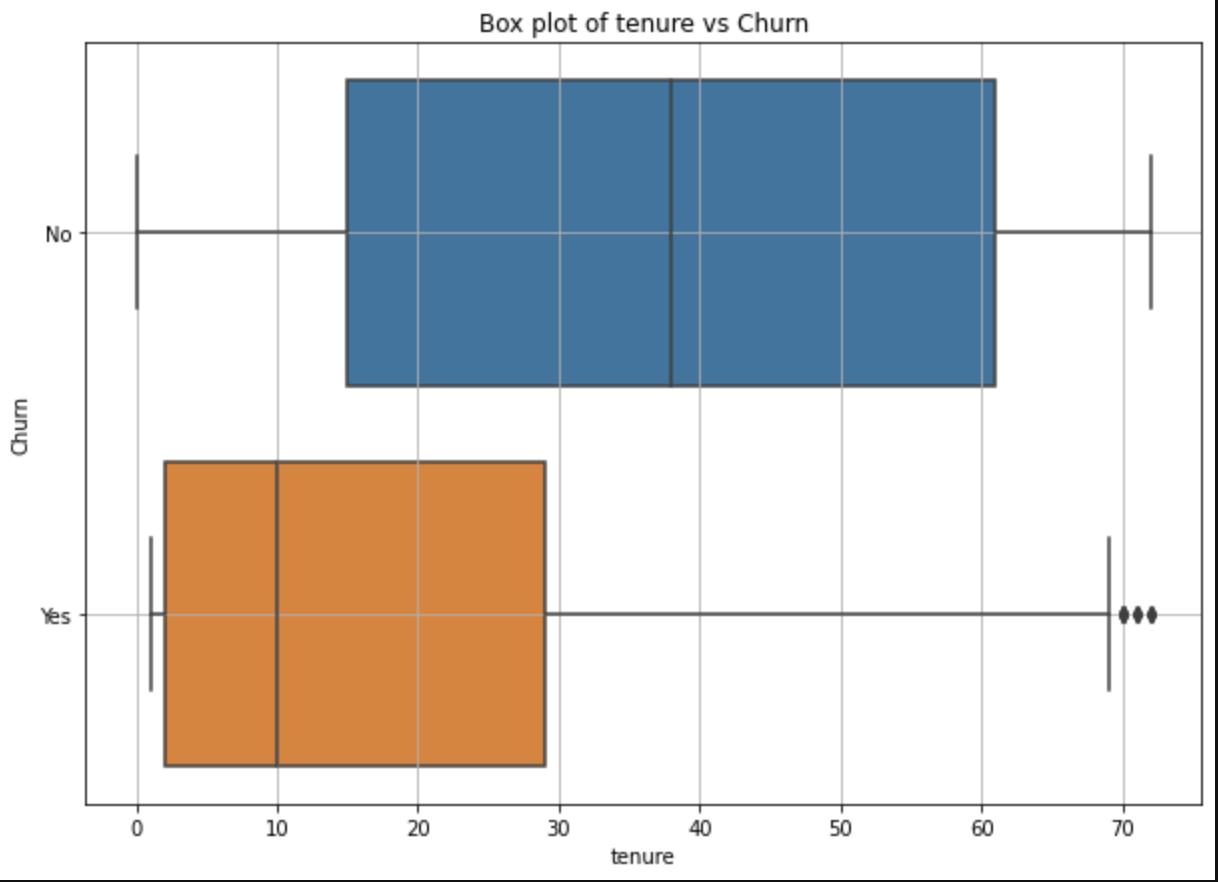
        
    1. We also saw that variables like `MonthlyCharges` and `TotalCharges` brought some distinct patterns out w.r.t to churn and tenure 
        1. 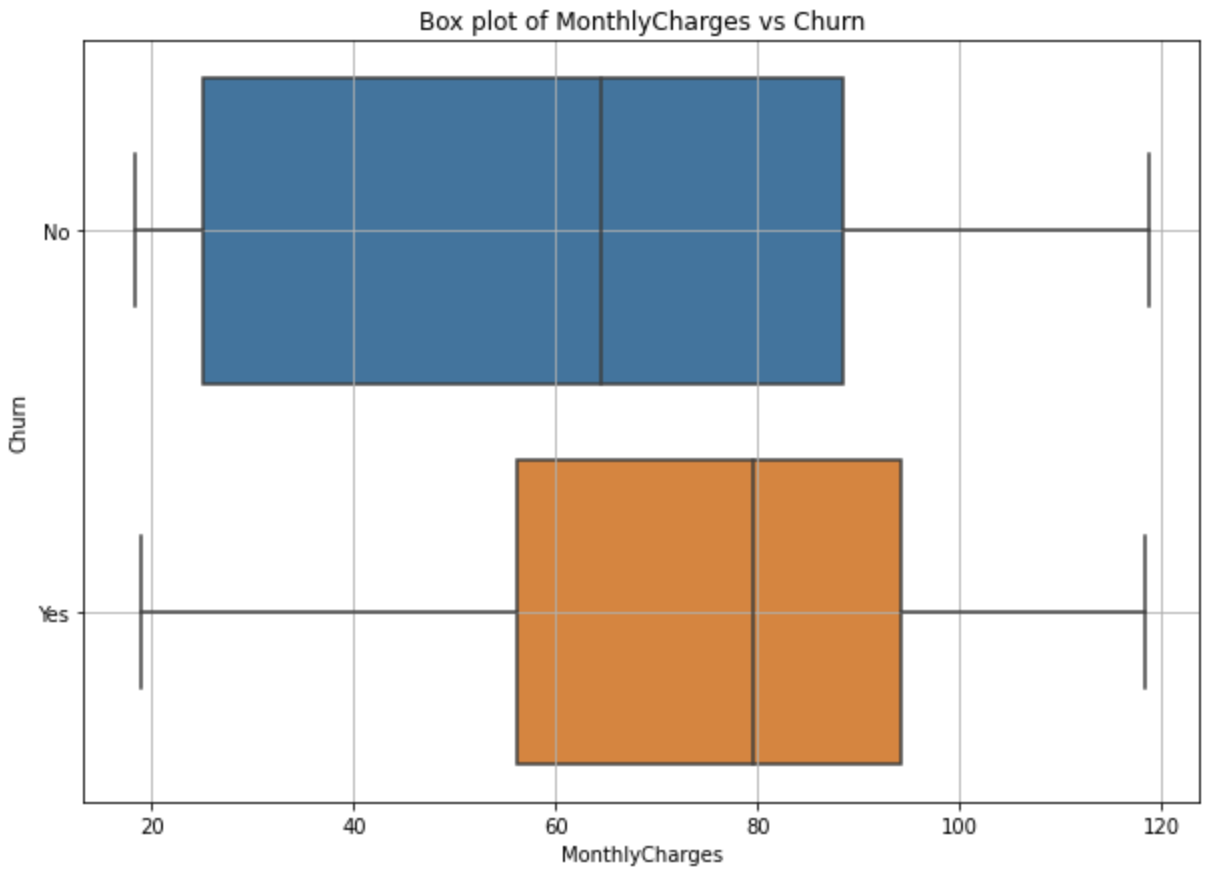
        1. 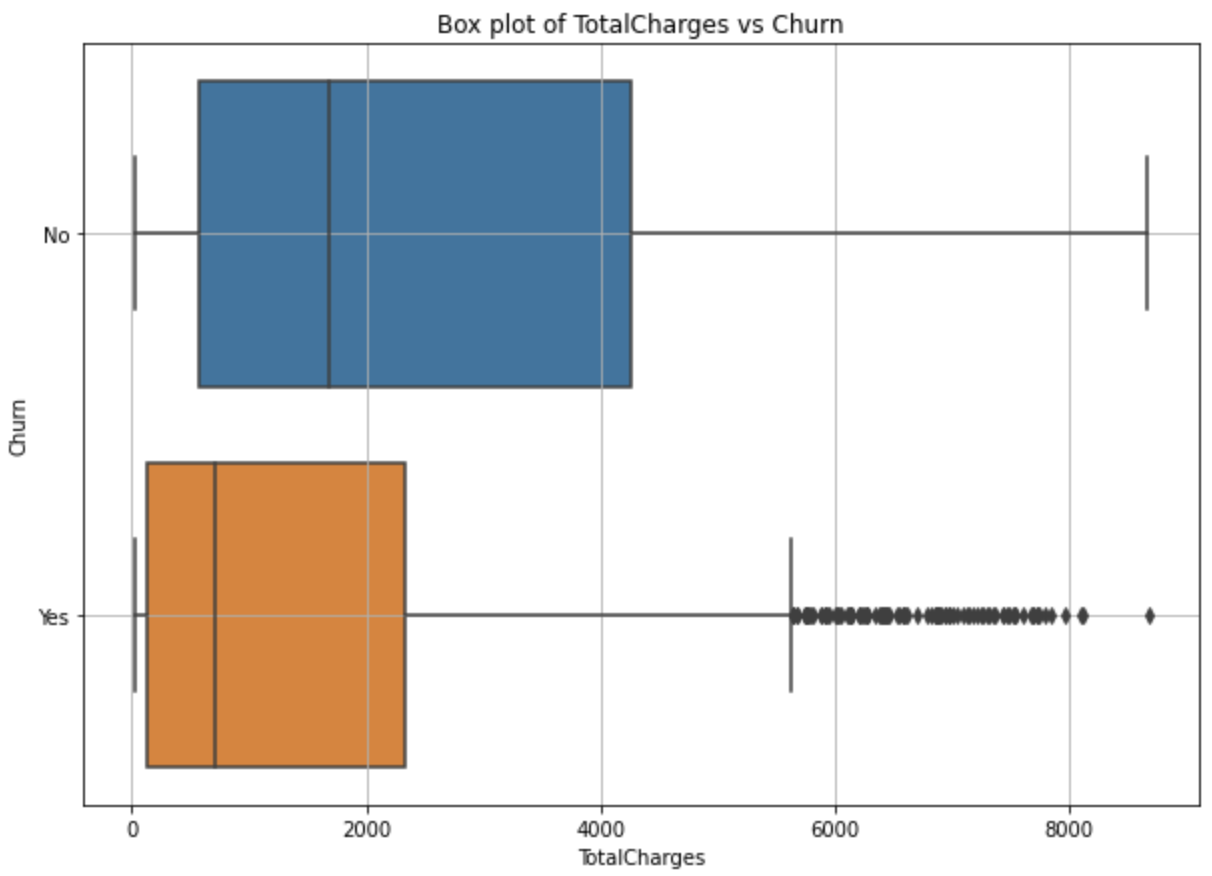
        1. Similar patterns could be observed in tenure
    1. We also saw distinct pattern in how contract is related to tenure
        1. 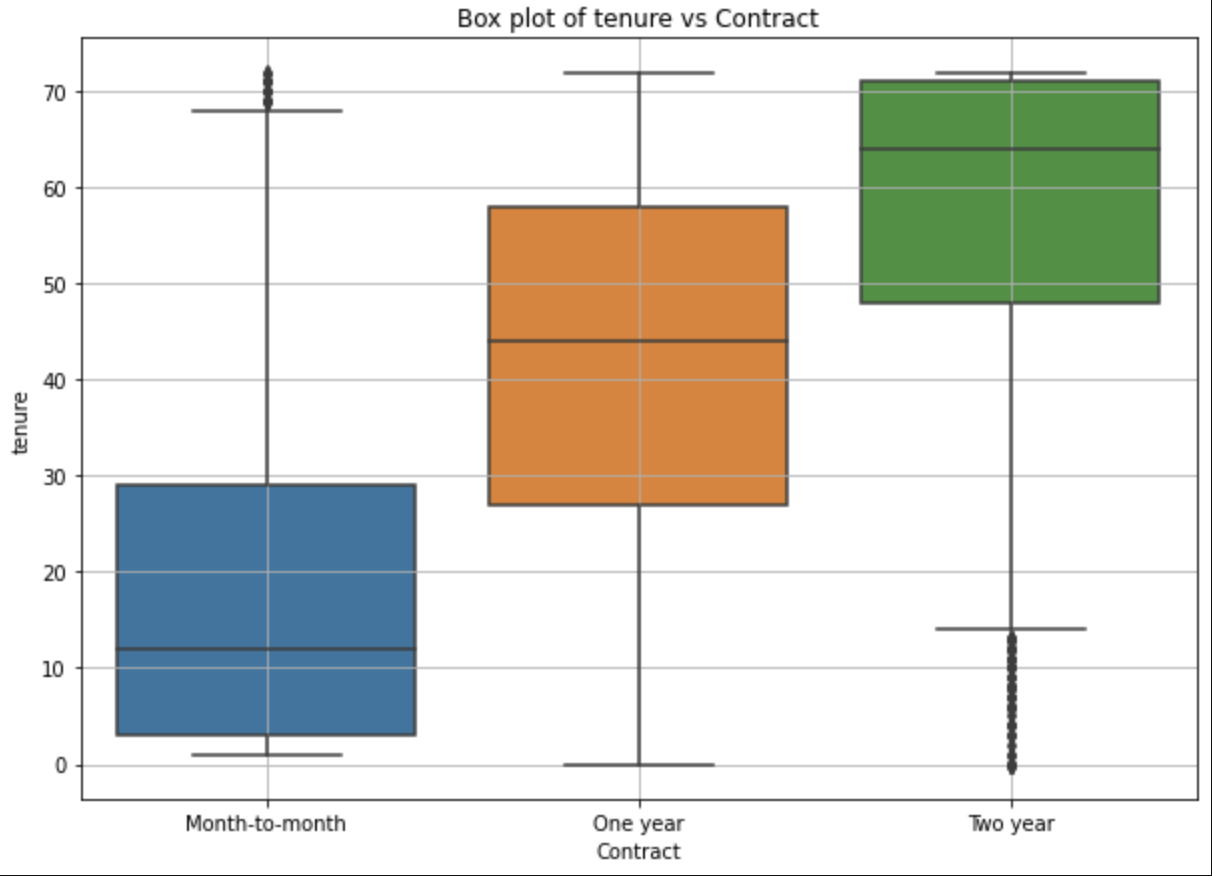

# Some thoughts that will help in hypothesis building

Thinking from a user perspective.

What would make a user churn from a telecom service?
1. is user getting additional service the user is getting by staying with telecom.
1. is user getting better cost of service else where?
1. is billing easier or not for current telecom service

# Initial hypotheses

1. Can we say that cost of service is contributor to churn?
1. Can we say that having additional internet services would contribute to churn?
1. Can we say that having a certain method of payment contribute to churn?
1. Can we say that longer the contract the customer is less likely to churn?
1. Can we say that senior citizen churn less as there is some effort required to change the service?

`NOTE` similar hypotheses can be created for tenure.

# Correlation analysis

1. We generally remove highly correlated features
1. Reason say if x (input feature), y (target) are highly correlated
1. We might miss out on some other explanatory feature
1. Chances are we might not learn the target variable well enough due to this highly correlated feature
[reference](https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas)

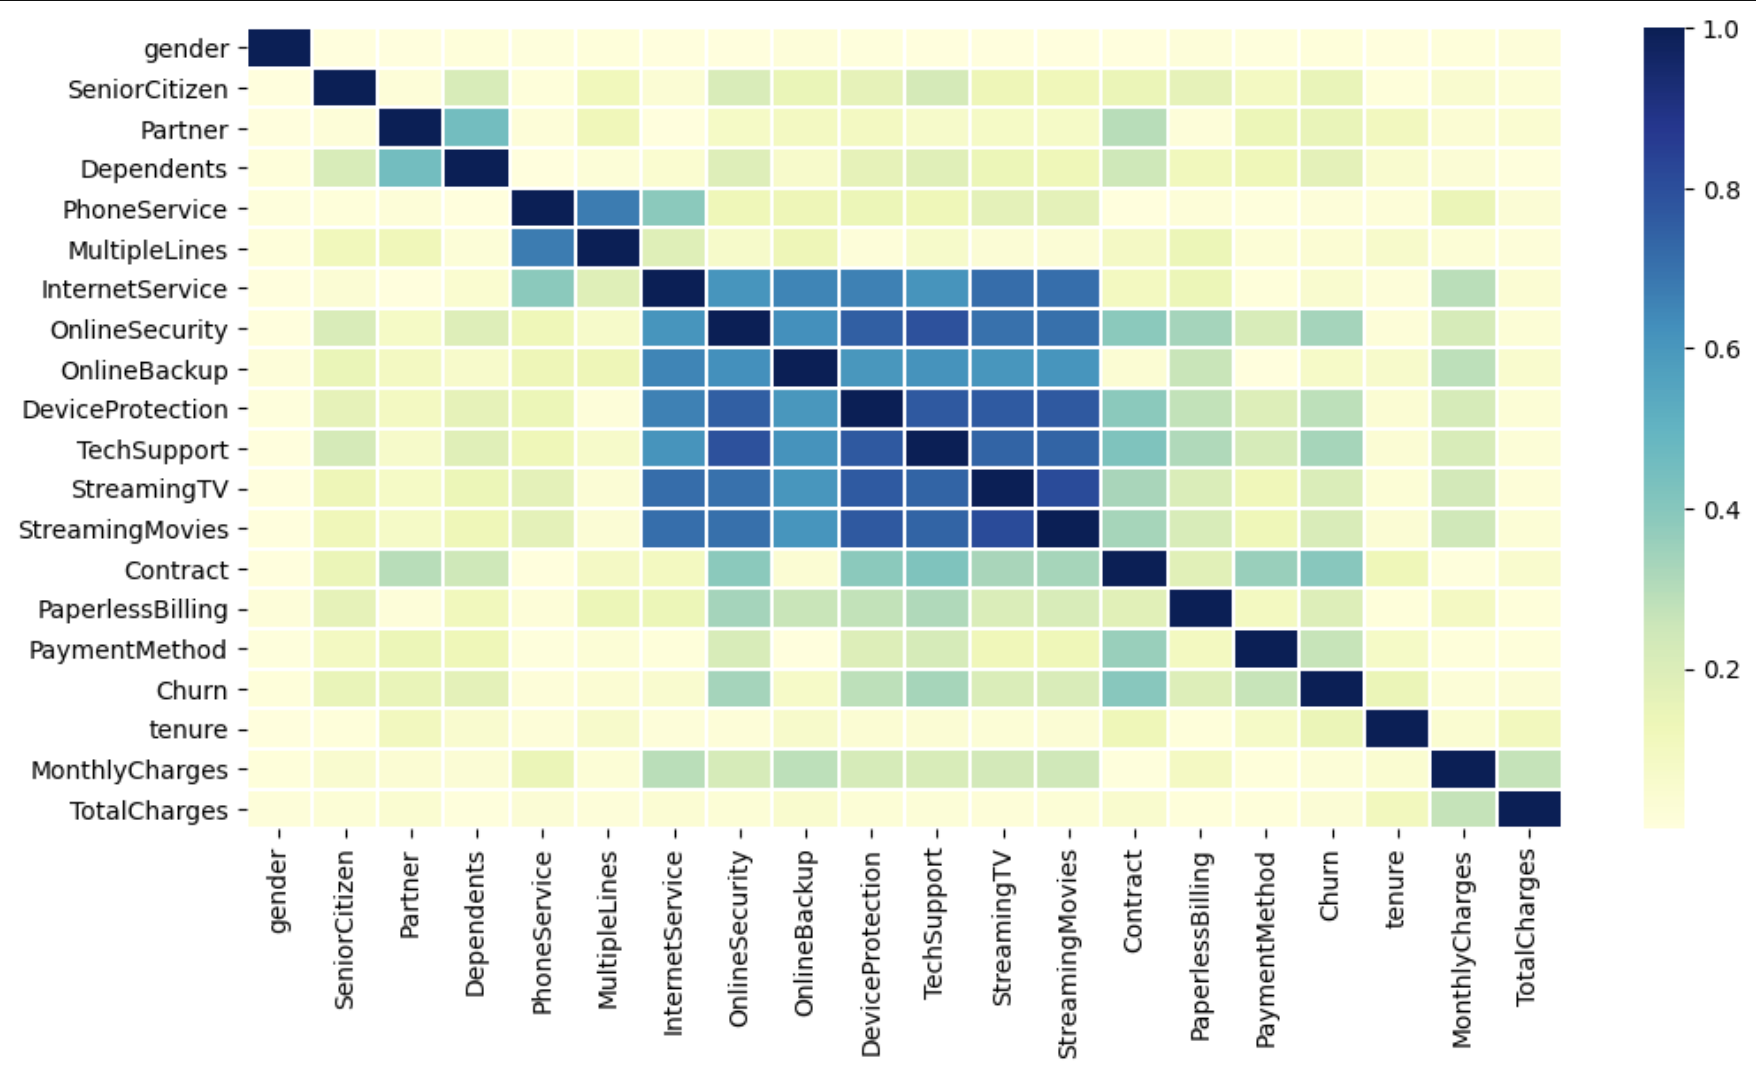

1. Plotted a correlation heatmap between features and dropped highly correlated features using a certain threshold

We could see that there is high correlation in:

1. `StreamingMovies` and `[InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingMovies]`

# Feature engineering

## Boolean features
1. Boolean features were encoder using simple mapping of 0,1

## Categorical features
1. Categorical features were encoded using binary encoder



## cyclical Time features
As mentioned in the problem statement, we had to add a time column, randomly assigned dates in between a certain range and designed features on top of these timestamps.

Understanding Cyclical time features

Let us use `sin_hour = sin((hour/24)*(2*pi))` for tracing an example.


**Let `r = hour/24`**
1. What are the values that `r` can take?
1. r = {0/24, 1/24, ..... 23/24, 24/24}
1. r = {0, 0.041, ..... , 0.95, 1}
1. r has range of [0,1]


`sin(2*pi)` = `sin(360 degrees)`
1. we will be multiplying `r` with `2*pi`
1. essentially we are calculating what fraction of `2*pi` are we looking at

## Scaling 

Real features were min max scaled and saved.

# Feature Selection

1. Feature selection was done 2 times one for classfication task and other for regression task
1. Both the tasks were done using respective derivatives of random forest i.e random forst classifier and regressor respectively

## Feature Selection - Classification

We can see that top features for classification according to random forest classifier's feature importance are:
1. 'TotalCharges', 
1. 'MonthlyCharges', 
1. 'Contract_0', 
1. 'cos_day',
1. 'sin_day'
1. 'TechSupport_0'

## Feature Selection - Regression

We can see that top features for regression according to random forest classifier's feature importance are:

1. 'TotalCharges'	
1. 'MonthlyCharges'	
1. 'Contract_0'	
1. 'Contract_1'	
1. 'InternetService_1'
1. 'InternetService_0'

# Splitting data

1. Data was split into two parts
1. train, test sets
1. train set was further divided into cv set using TimeSplitCV
1. Image of time series split 
    1. blue = train, red = cv
    1. Scores of each iteration will be averaged to get final cv score


![image](https://miro.medium.com/max/1572/1*XcqvKVTQ6U_zszSD52lSqA.png)

# Modelling and Model evaluation

As mentioned in the problem statement used top 6 features according to feature importances for modelling Churn and tenure.

## What should we look for in classification?

> Precision or recall?

What is more harmful to have?

1. FP → person who is not going to churn being predicted as 1
2. FN → person who is going to churn being predicted as 0
3. FN is more harmful

Hence recall is more important.

- recall = TP/(TP+FN) = TP/P
- out of total positives how many are actually(true) positives


To be more specific recall on class 1 is more important

## Setting baseline for classifier

1. Used a random model to get target labels

Observations:
1. log_loss on train and test sets was very close to 1  - (train 0.98 , test 0.94)
1. Precision and recall matrix of both train and test sets were very similar attaching PR matrix of predictions on test set

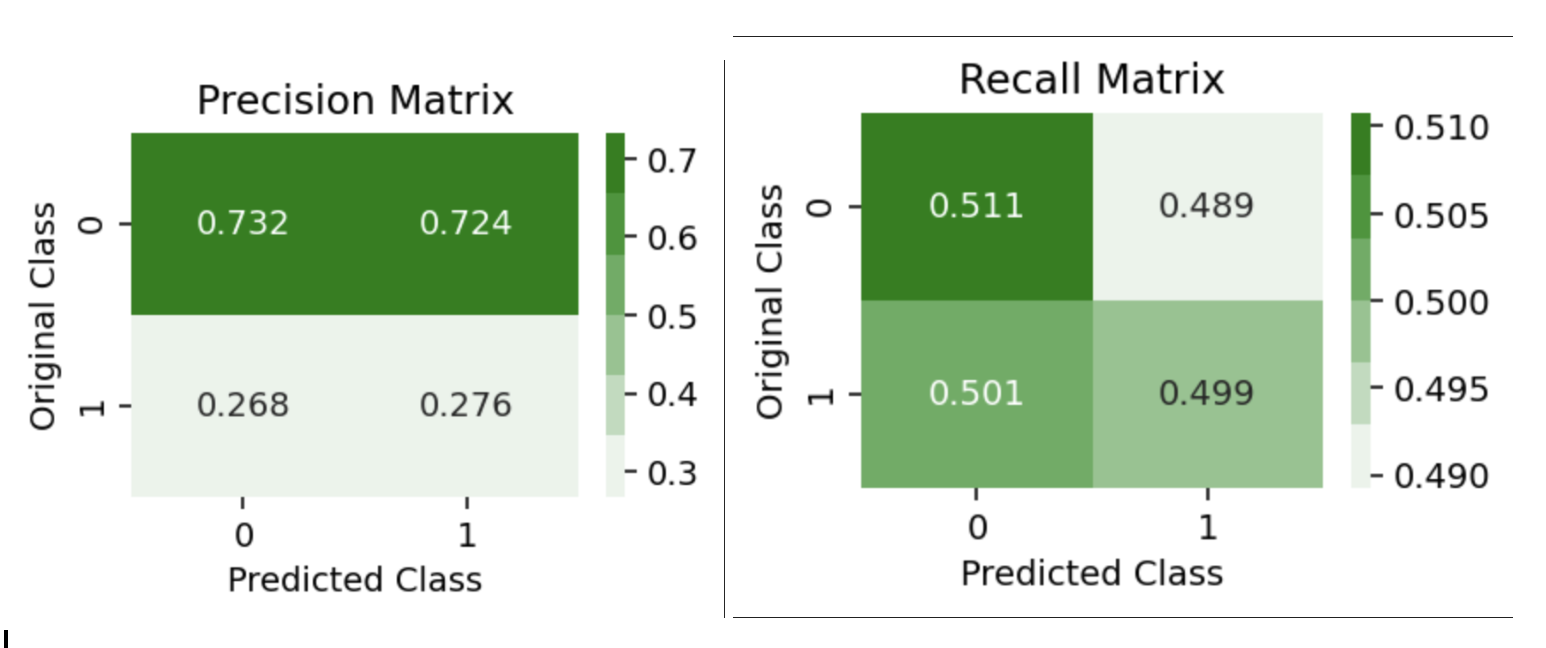

1. We can see how random model is predicted each class with equal probability in recall matrix
1. Whereas in Precision matrix we can see that how imbalance is affecting the predictions
1. because churn labels are in ratio of ≈ 1:3 (yes:no) probability of predicting No label i.e 0 class is around 70%

We had established from random model that log_loss should be better than 1.0

log_loss will be primary metric that we will try to optimise for, precision and recall matrix will help us understand where we misclassified.

## Classification using RandomForestClassifier

1. Trained a random forest model to predict labels
1. as n_estimators drastically affects generalization of model
1. First this model was trained to give best train validation log_loss by iterating over various n_estimators
1. Once we found out best n_estimators then use grid search on top of this model with best n_estimators

### Observations

#### Train set
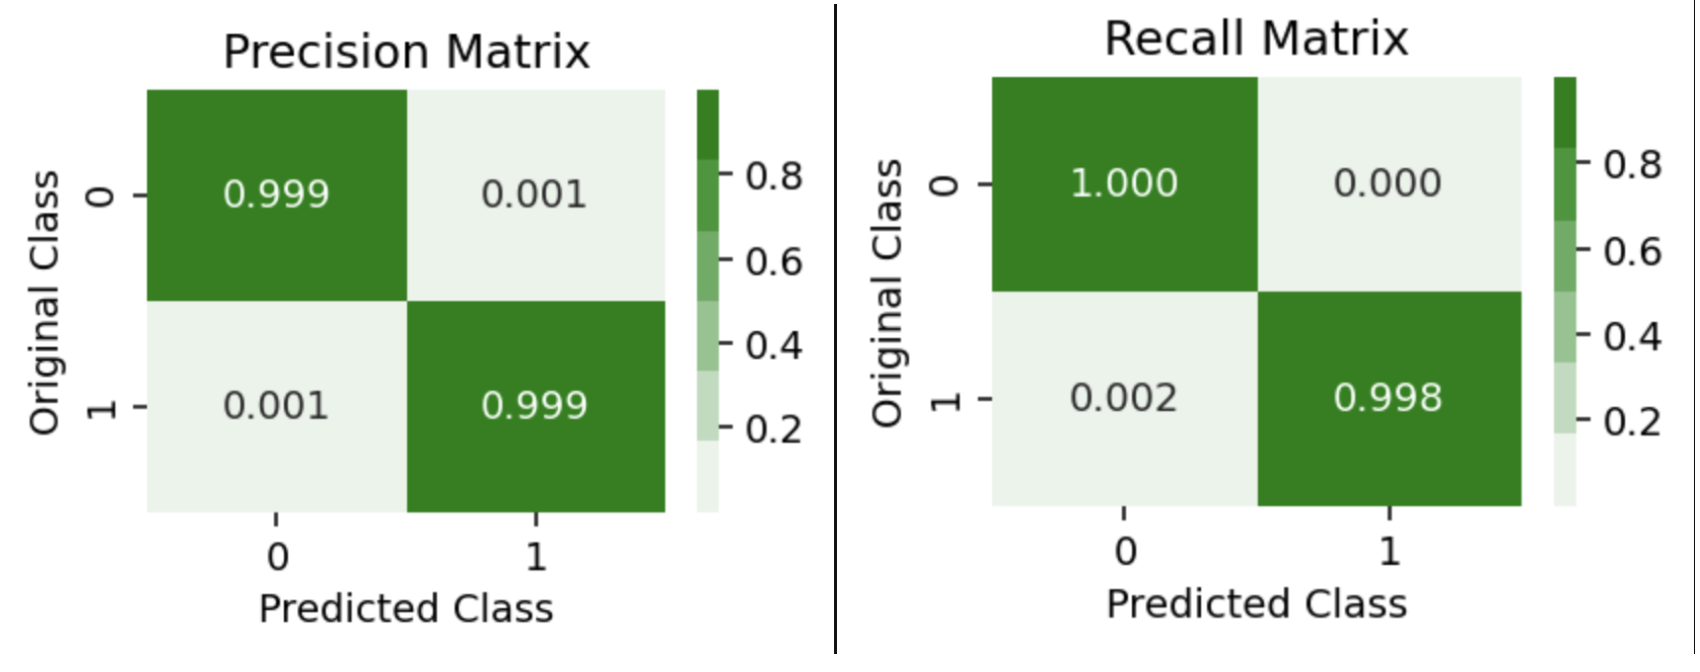

#### Test set

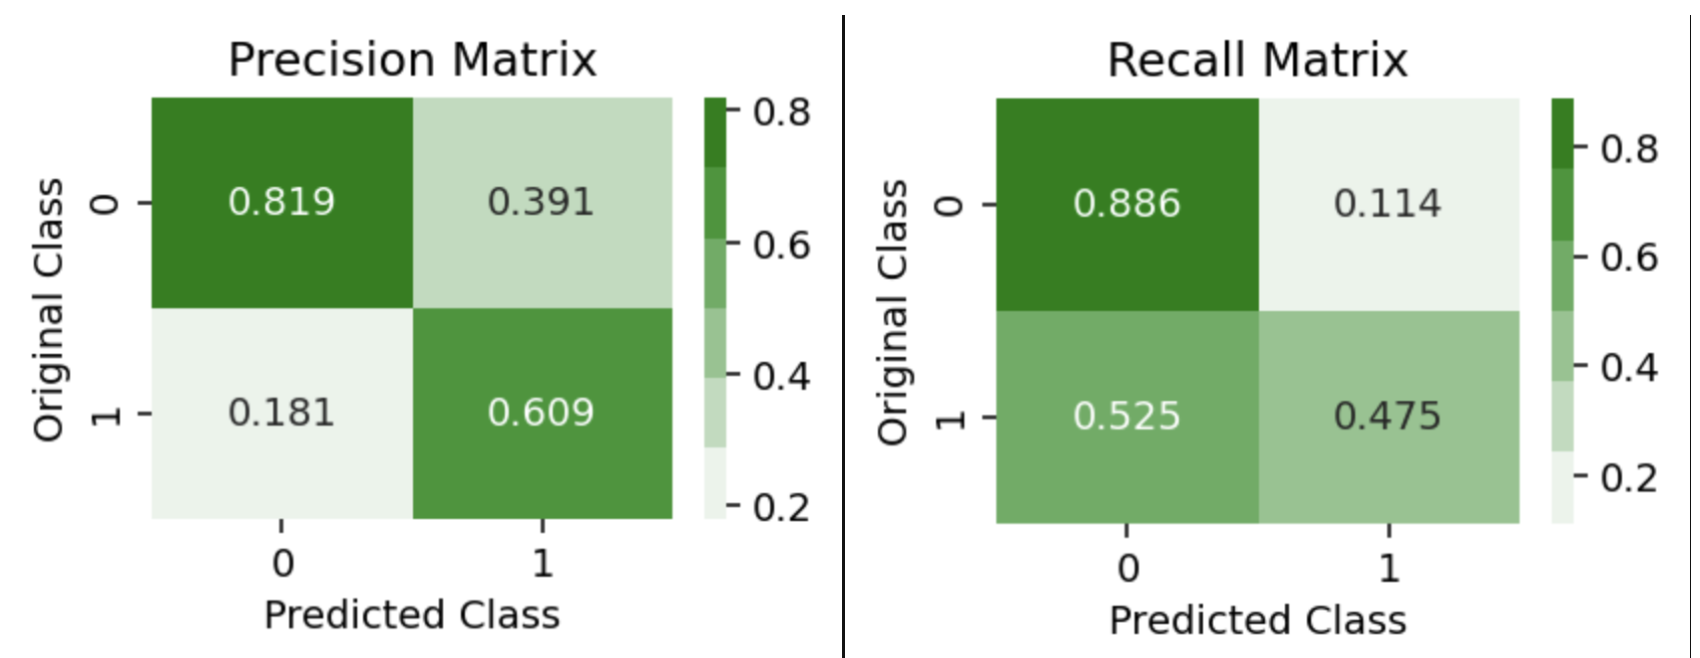

log loss train 0.11384032771799346

log loss test 0.5404848995450136

1. We can see that model is fitting training data very well
1. But is not performing well on Test set
1. We can see that log loss is drastically less than that of random model
    1. log loss train is 0.11
    1. log loss test is 0.54
1. We can see that difference in recall of class 1 in train and test is very high (~52%)
1. [Precision matrix] In test set we can see that almost 40% of predicted positives are misclassified
1. [Recall matrix] In test set we can see that almost 52% of actual positives are misclassified
1. Model was serialised with small improvements in logloss after fine tuning

## Classification using XgBoostClassifier

1. Trained a xgboost model to predict labels
1. as n_estimators drastically affects generalization of model
1. First this model was trained to give best train validation log_loss by iterating over various n_estimators
1. Once we found out best n_estimators then use grid search on top of this model with best n_estimators

### Observations

#### Train set

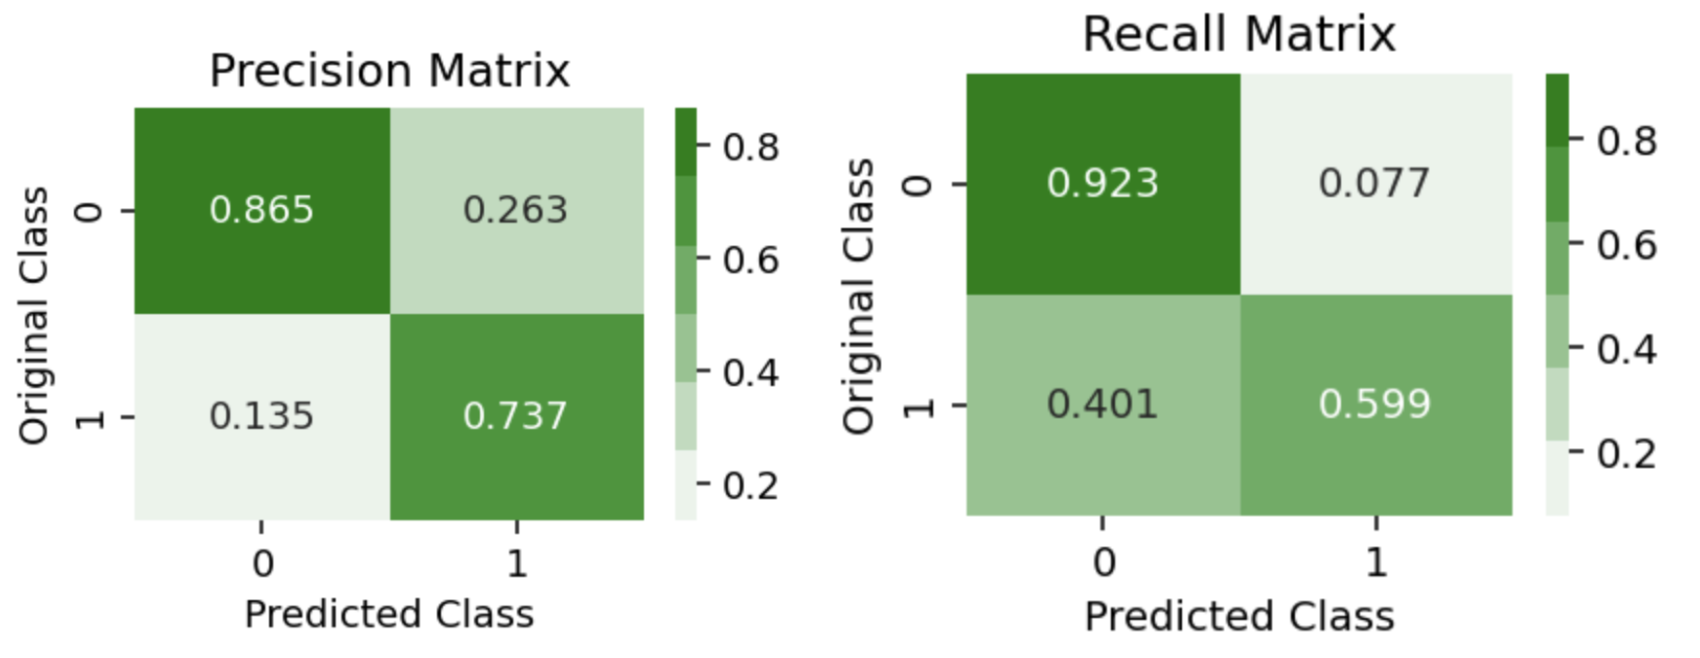

#### Test set

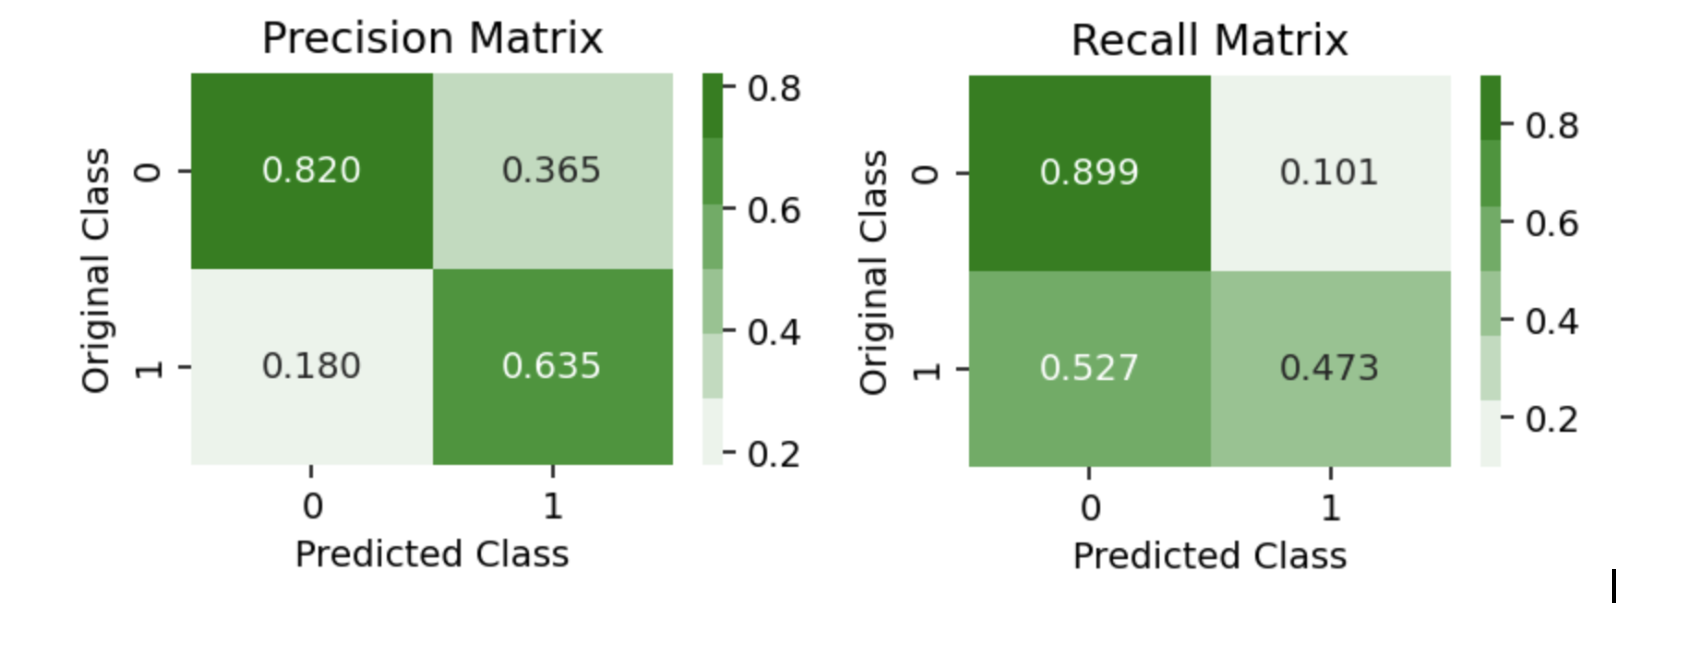

log loss train 0.3509486212673173

log loss test 0.44877092160860893

1. We can see that model is fitting training data very well
1. But is not performing well on Test set
1. We can see that log loss is drastically less than that of random model
    1. log loss train 0.35
    1. log loss test 0.44
1. We can see that difference in recall of class 1 in train and test is relatively low (~12%)
1. [Precision matrix] In test set we can see that almost 36% of predicted positives are misclassified
1. [Recall matrix] In test set we can see that almost 52% of actual positives are misclassified
1. Model was serialised with small improvements in logloss after fine tuning

## Setting baseline for regressor

### Observations

#### Train set

#### Test set

## Classification using RandomForestRegressor

### Observations

#### Train set

#### Test set

## Classification using XgBoostRegressor

### Observations

#### Train set

#### Test set